In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("nifty_expiry_days_22.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct,oc_range,oc_range_pct
0,129,2022-01-06,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,142.40,0.801418,22.60,0.127191
1,134,2022-01-13,18257.00,18272.25,18163.80,18257.80,303700545,28670.93,108.45,0.594019,0.80,0.004382
2,139,2022-01-20,17921.00,17943.70,17648.45,17757.00,258094246,25863.29,295.25,1.647509,164.00,0.915128
3,143,2022-01-27,17062.00,17182.50,16866.75,17110.15,395596577,36296.64,315.75,1.850604,48.15,0.282206
4,148,2022-02-03,17767.75,17781.15,17511.15,17560.20,226614989,20373.06,270.00,1.519607,207.55,1.168128


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [4]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct,oc_range,oc_range_pct
0,129,2022-01-06,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,142.40,0.801418,22.60,0.127191
1,134,2022-01-13,18257.00,18272.25,18163.80,18257.80,303700545,28670.93,108.45,0.594019,0.80,0.004382
2,139,2022-01-20,17921.00,17943.70,17648.45,17757.00,258094246,25863.29,295.25,1.647509,164.00,0.915128
3,143,2022-01-27,17062.00,17182.50,16866.75,17110.15,395596577,36296.64,315.75,1.850604,48.15,0.282206
4,148,2022-02-03,17767.75,17781.15,17511.15,17560.20,226614989,20373.06,270.00,1.519607,207.55,1.168128


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)', 'day_range', 'day_range_pct', 'oc_range',
       'oc_range_pct'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               240 non-null    object 
 1   Open               240 non-null    float64
 2   High               240 non-null    float64
 3   Low                240 non-null    float64
 4   Close              240 non-null    float64
 5   Shares Traded      240 non-null    int64  
 6   Turnover (Rs. Cr)  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,240.0,1.706008e+04,7.621198e+02,15272.65,1.647361e+04,1.719797e+04,1.762881e+04,1.860235e+04
High,240.0,1.714822e+04,7.551928e+02,15400.40,1.653627e+04,1.730780e+04,1.774434e+04,1.860445e+04
Low,240.0,1.693901e+04,7.545604e+02,15183.40,1.635400e+04,1.706435e+04,1.751436e+04,1.844530e+04
Close,240.0,1.704648e+04,7.561988e+02,15293.50,1.647120e+04,1.719875e+04,1.762004e+04,1.847705e+04
Shares Traded,240.0,3.016702e+08,8.348404e+07,48520856.00,2.463861e+08,2.832574e+08,3.369160e+08,6.516136e+08
Turnover (Rs. Cr),240.0,2.431301e+04,5.967099e+03,3637.06,2.063689e+04,2.337160e+04,2.716411e+04,5.292935e+04


In [8]:
data = df
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,17359.97
1,2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,18015.42
2,2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,14976.54
3,2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,24456.05
4,2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,22259.96


In [9]:
data['day_range'] = np.abs(data['High'] - data['Low'])
data['day_range_pct'] = (data['day_range']/data['Open'])*100
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct
0,2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,17359.97,88.50,0.561725
1,2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,18015.42,102.40,0.651986
2,2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,14976.54,83.90,0.531235
3,2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,24456.05,113.20,0.715833
4,2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,22259.96,113.85,0.719677


In [10]:
data['oc_range'] = np.abs(data['Open'] - data['Close'])
data['oc_range_pct'] = (data['oc_range']/data['Open'])*100
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct,oc_range,oc_range_pct
0,2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,17359.97,88.50,0.561725,75.05,0.476355
1,2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,18015.42,102.40,0.651986,16.35,0.104101
2,2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,14976.54,83.90,0.531235,40.95,0.259286
3,2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,24456.05,113.20,0.715833,4.50,0.028456
4,2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,22259.96,113.85,0.719677,60.05,0.379592


In [11]:
data.shape

(240, 11)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,240.0,1.706008e+04,7.621198e+02,1.527265e+04,1.647361e+04,1.719797e+04,1.762881e+04,1.860235e+04
High,240.0,1.714822e+04,7.551928e+02,1.540040e+04,1.653627e+04,1.730780e+04,1.774434e+04,1.860445e+04
Low,240.0,1.693901e+04,7.545604e+02,1.518340e+04,1.635400e+04,1.706435e+04,1.751436e+04,1.844530e+04
Close,240.0,1.704648e+04,7.561988e+02,1.529350e+04,1.647120e+04,1.719875e+04,1.762004e+04,1.847705e+04
Shares Traded,240.0,3.016702e+08,8.348404e+07,4.852086e+07,2.463861e+08,2.832574e+08,3.369160e+08,6.516136e+08
Turnover (Rs. Cr),240.0,2.431301e+04,5.967099e+03,3.637060e+03,2.063689e+04,2.337160e+04,2.716411e+04,5.292935e+04
day_range,240.0,2.092127e+02,9.997091e+01,4.695000e+01,1.390750e+02,1.889750e+02,2.611125e+02,6.015500e+02
day_range_pct,240.0,1.227594e+00,5.898898e-01,2.617779e-01,8.040933e-01,1.117894e+00,1.506607e+00,3.422730e+00
oc_range,240.0,1.072250e+02,9.096451e+01,1.500000e-01,4.061250e+01,8.205000e+01,1.470000e+02,4.716500e+02
oc_range_pct,240.0,6.278478e-01,5.360646e-01,8.555833e-04,2.356540e-01,4.744485e-01,8.755500e-01,2.979046e+00


## Data in 2022

In [13]:
mask = data['Date'] > '2022-01-01'
data_22 = data.loc[mask]
data_22

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct,oc_range,oc_range_pct
126,2022-01-03,17387.15,17646.65,17383.30,17625.70,200456430,16181.36,263.35,1.514624,238.55,1.371990
127,2022-01-04,17681.40,17827.60,17593.55,17805.25,247437472,18604.16,234.05,1.323707,123.85,0.700454
128,2022-01-05,17820.10,17944.70,17748.85,17925.25,251460038,23737.31,195.85,1.099040,105.15,0.590064
129,2022-01-06,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,142.40,0.801418,22.60,0.127191
130,2022-01-07,17797.60,17905.00,17704.55,17812.70,239338015,21447.89,200.45,1.126275,15.10,0.084843
...,...,...,...,...,...,...,...,...,...,...,...
235,2022-06-13,15877.55,15886.15,15684.00,15774.40,225534385,20002.64,202.15,1.273181,103.15,0.649659
236,2022-06-14,15674.25,15858.00,15659.45,15732.10,225425862,19825.41,198.55,1.266727,57.85,0.369077
237,2022-06-15,15729.25,15783.65,15678.90,15692.15,183011236,16063.24,104.75,0.665957,37.10,0.235866
238,2022-06-16,15832.25,15863.15,15335.10,15360.60,264735957,21383.06,528.05,3.335281,471.65,2.979046


In [14]:
data_22.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,114.0,1.699648e+04,6.908396e+02,1.527265e+04,1.647661e+04,1.710850e+04,1.750644e+04,1.833720e+04
High,114.0,1.710202e+04,6.737226e+02,1.540040e+04,1.653846e+04,1.723642e+04,1.759838e+04,1.835095e+04
Low,114.0,1.686046e+04,7.002052e+02,1.518340e+04,1.634245e+04,1.698840e+04,1.738622e+04,1.822875e+04
Close,114.0,1.698560e+04,6.983851e+02,1.529350e+04,1.643179e+04,1.711388e+04,1.749260e+04,1.830810e+04
Shares Traded,114.0,2.990786e+08,8.397300e+07,1.830112e+08,2.451752e+08,2.771540e+08,3.199757e+08,6.516136e+08
Turnover (Rs. Cr),114.0,2.483947e+04,5.955697e+03,1.606324e+04,2.105048e+04,2.378067e+04,2.706993e+04,5.292935e+04
day_range,114.0,2.415596e+02,1.035146e+02,9.280000e+01,1.661750e+02,2.176750e+02,2.928500e+02,6.015500e+02
day_range_pct,114.0,1.429047e+00,6.254768e-01,5.088933e-01,9.621791e-01,1.320096e+00,1.716168e+00,3.422730e+00
oc_range,114.0,1.264452e+02,1.016266e+02,8.000000e-01,5.447500e+01,9.390000e+01,1.938375e+02,4.716500e+02
oc_range_pct,114.0,7.477255e-01,6.089100e-01,4.381881e-03,3.136670e-01,5.576697e-01,1.119200e+00,2.979046e+00


### High-low range

<AxesSubplot:xlabel='Date', ylabel='day_range'>

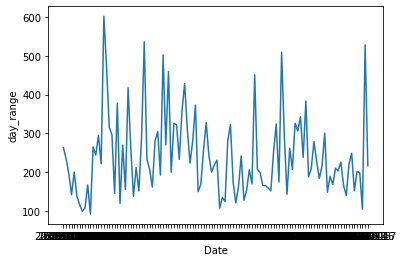

In [15]:
x = data_22['Date']
y = data_22['day_range']
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='day_range', ylabel='Count'>

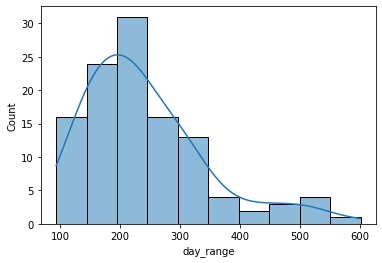

In [16]:
sns.histplot(data_22['day_range'], kde=True)

### Open-close range  

<AxesSubplot:xlabel='Date', ylabel='oc_range'>

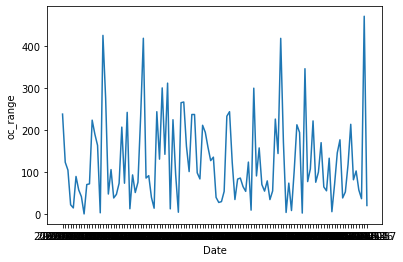

In [17]:
x = data_22['Date']
y = data_22['oc_range']
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='oc_range', ylabel='Count'>

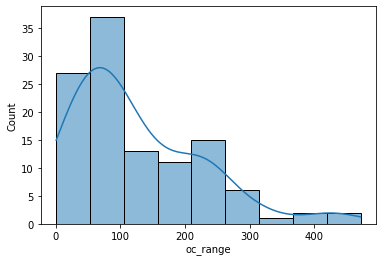

In [18]:
sns.histplot(data_22['oc_range'], kde=True)

<AxesSubplot:xlabel='oc_range', ylabel='day_range'>

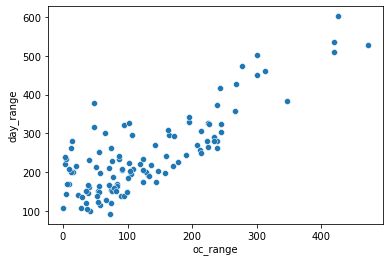

In [19]:
x = data_22['oc_range']
y = data_22['day_range']
sns.scatterplot(x=x, y=y)

In [20]:
data_22.corr()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct,oc_range,oc_range_pct
Open,1.000000,0.991608,0.987571,0.972764,-0.219100,-0.097015,-0.226377,-0.310039,-0.108350,-0.153923
High,0.991608,1.000000,0.989386,0.988919,-0.202486,-0.076863,-0.184040,-0.267304,-0.064255,-0.109245
Low,0.987571,0.989386,1.000000,0.989905,-0.242342,-0.126742,-0.324914,-0.404355,-0.182560,-0.226104
Close,0.972764,0.988919,0.989905,1.000000,-0.211322,-0.093098,-0.259668,-0.338982,-0.135396,-0.178017
Shares Traded,-0.219100,-0.202486,-0.242342,-0.211322,1.000000,0.925266,0.321395,0.337520,0.103173,0.113233
Turnover (Rs. Cr),-0.097015,-0.076863,-0.126742,-0.093098,0.925266,1.000000,0.357061,0.359624,0.127537,0.129830
day_range,-0.226377,-0.184040,-0.324914,-0.259668,0.321395,0.357061,1.000000,0.995438,0.816695,0.818421
day_range_pct,-0.310039,-0.267304,-0.404355,-0.338982,0.337520,0.359624,0.995438,1.000000,0.810344,0.817398
oc_range,-0.108350,-0.064255,-0.182560,-0.135396,0.103173,0.127537,0.816695,0.810344,1.000000,0.998063
oc_range_pct,-0.153923,-0.109245,-0.226104,-0.178017,0.113233,0.129830,0.818421,0.817398,0.998063,1.000000


### Returns  

In [21]:
daily_return = data_22['Close'].pct_change(1)
daily_return.head()

126         NaN
127    0.010187
128    0.006740
129   -0.010005
130    0.003764
Name: Close, dtype: float64

<AxesSubplot:>

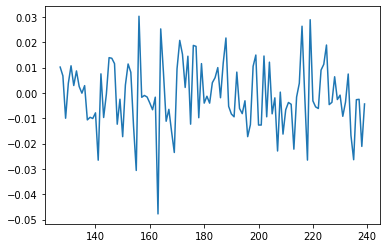

In [22]:
daily_return.plot.line()

<AxesSubplot:xlabel='Close', ylabel='Count'>

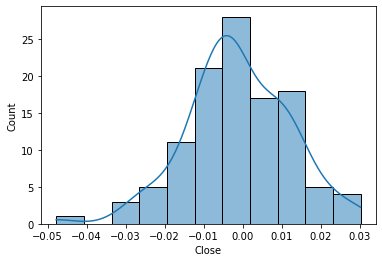

In [23]:
sns.histplot(daily_return, kde=True)

In [24]:
daily_return.describe()

count    113.000000
mean      -0.001168
std        0.013213
min       -0.047781
25%       -0.009440
50%       -0.001956
75%        0.008209
max        0.030259
Name: Close, dtype: float64

In [25]:
daily_return[daily_return > 0].count()

45

In [26]:
daily_return[daily_return < 0].count()

68

In [27]:
daily_return[daily_return > 0].describe()

count    45.000000
mean      0.011514
std       0.007259
min       0.000303
25%       0.006740
50%       0.010490
75%       0.014560
max       0.030259
Name: Close, dtype: float64

In [28]:
daily_return[daily_return < 0].describe()

count    68.000000
mean     -0.009561
std       0.008814
min      -0.047781
25%      -0.012561
50%      -0.007271
75%      -0.003152
max      -0.000112
Name: Close, dtype: float64

In [29]:
daily_return.tail(10)

230   -0.000889
231   -0.009246
232   -0.003661
233    0.007450
234   -0.016768
235   -0.026380
236   -0.002682
237   -0.002539
238   -0.021128
239   -0.004368
Name: Close, dtype: float64

### Moving averages/Rolling means  

In [30]:
sma_5 = data_22['Close'].rolling(window=5).mean()
sma_5.tail(5)

235    16245.38
236    16108.53
237    15975.71
238    15752.21
239    15570.55
Name: Close, dtype: float64

<AxesSubplot:>

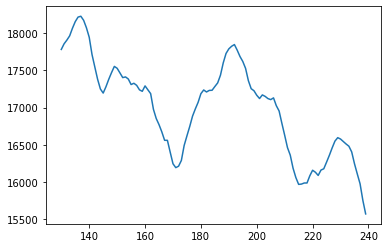

In [31]:
sma_5.plot.line()

In [32]:
sma_10 = data_22['Close'].rolling(window=10).mean()
sma_10.tail(5)

235    16411.605
236    16326.360
237    16243.300
238    16116.560
239    15987.480
Name: Close, dtype: float64

<AxesSubplot:>

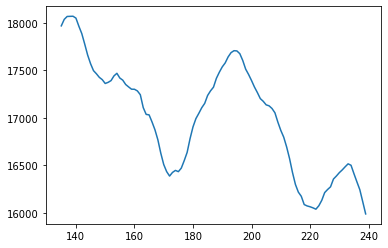

In [33]:
sma_10.plot.line()

In [34]:
sma_20 = data_22['Close'].rolling(window=20).mean()
sma_20.tail(5)

235    16312.0425
236    16285.6825
237    16258.2750
238    16235.8350
239    16187.2025
Name: Close, dtype: float64

<AxesSubplot:>

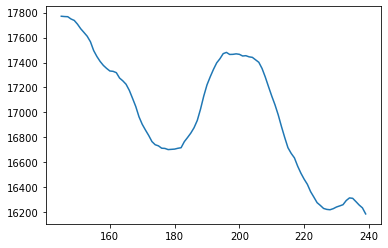

In [35]:
sma_20.plot.line()

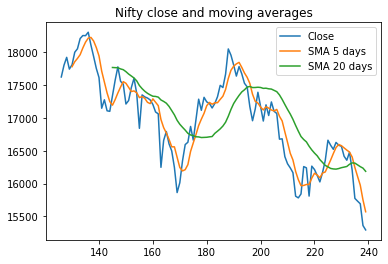

In [36]:
plt.plot(data_22['Close'], label='Close')
plt.plot(sma_5, label='SMA 5 days')
plt.plot(sma_20, label='SMA 20 days')
plt.legend(loc='best')
plt.title('Nifty close and moving averages')
plt.show()

In [91]:
from datetime import timedelta, date
def get_days(start, day_index, end=None):
    # set the start as the next valid day
    start += timedelta(days=(day_index - start.weekday()) % 7)
    week = timedelta(days=7)
    while end and start < end or not end:
        yield start
        start += week

In [92]:
thursday_generator = get_days(date(2022, 1, 1), 3, date(2022, 6, 22))
thursdays = list(map(str, thursday_generator))
print(thursdays)
"""
[datetime.date(2015, 1, 8), datetime.date(2015, 1, 15), datetime.date(2015, 1, 22), ...]
"""

['2022-01-06', '2022-01-13', '2022-01-20', '2022-01-27', '2022-02-03', '2022-02-10', '2022-02-17', '2022-02-24', '2022-03-03', '2022-03-10', '2022-03-17', '2022-03-24', '2022-03-31', '2022-04-07', '2022-04-14', '2022-04-21', '2022-04-28', '2022-05-05', '2022-05-12', '2022-05-19', '2022-05-26', '2022-06-02', '2022-06-09', '2022-06-16']


'\n[datetime.date(2015, 1, 8), datetime.date(2015, 1, 15), datetime.date(2015, 1, 22), ...]\n'

In [97]:
expiry_days_22 = data_22[data_22['Date'].isin(thursdays)]
expiry_days_22

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day_range,day_range_pct,oc_range,oc_range_pct
129,2022-01-06,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,142.40,0.801418,22.60,0.127191
134,2022-01-13,18257.00,18272.25,18163.80,18257.80,303700545,28670.93,108.45,0.594019,0.80,0.004382
139,2022-01-20,17921.00,17943.70,17648.45,17757.00,258094246,25863.29,295.25,1.647509,164.00,0.915128
143,2022-01-27,17062.00,17182.50,16866.75,17110.15,395596577,36296.64,315.75,1.850604,48.15,0.282206
148,2022-02-03,17767.75,17781.15,17511.15,17560.20,226614989,20373.06,270.00,1.519607,207.55,1.168128
153,2022-02-10,17554.10,17639.45,17427.15,17605.85,273606440,22210.93,212.30,1.209404,51.75,0.294803
158,2022-02-17,17396.55,17442.90,17235.85,17304.60,232136131,19381.26,207.05,1.190179,91.95,0.528553
163,2022-02-24,16548.90,16705.25,16203.25,16247.95,457967874,36650.83,502.00,3.033434,300.95,1.818550
167,2022-03-03,16723.20,16768.95,16442.95,16498.05,442068263,31413.00,326.00,1.949388,225.15,1.346333
172,2022-03-10,16757.10,16757.30,16447.90,16594.90,486445481,35513.73,309.40,1.846382,162.20,0.967948


In [98]:
expiry_days_22.to_csv("nifty_expiry_days_22.csv")